In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import h5py
import pandas as pd
import os.path as osp
import json
from scipy.io import loadmat
import mne
import seaborn as sns

In [14]:
# mat = scipy.io.loadmat("../data/derivatives/RDM/stats_RDM_full.mat")
DATA_PATH = "../data"

## Loading Data

Loading participant data

In [15]:
participants_data = pd.read_csv(osp.join(DATA_PATH, "participants.tsv"), sep="\t")
participants_data.head()
print(participants_data.shape)

(50, 8)


Understanding what each header means

In [16]:
with open(osp.join(DATA_PATH, "participants.json"), "rb") as f:
    participants_data_meta = json.load(f)
participants_data_meta

{'participant_id': {'Description': 'participant number'},
 'age': {'Description': 'participant age in years at time of acquisition'},
 'gender': {'Description': 'participant self-reported gender (M:Male, F:Female)'},
 'native_english': {'Description': 'Whether the participant was a native English speaker'},
 'language_profile': {'Description': 'Number of languages spoken'},
 'language_spoken_at_home': {'Description': 'Language spoken at home'},
 'exclude': {'Description': '1 for suggested exclusion of participant due to very poor signal or missing data'},
 'note_IZ': {'Description': 'Experimenter notes'}}

Loading a single participants EEG data using the mne package

In [17]:
bv = mne.io.read_raw_brainvision("../data/sub-01/eeg/sub-01_task-rsvp_eeg.vhdr")
bv

Extracting parameters from ../data/sub-01/eeg/sub-01_task-rsvp_eeg.vhdr...
Setting channel info structure...


<RawBrainVision | sub-01_task-rsvp_eeg.eeg, 63 x 3035740 (3035.7 s), ~93 kB, data not loaded>

In [18]:
# extract some useful values
times = bv.times # time values of each sample
N = bv.n_times # sample count
channel_types = bv.get_channel_types()

In [19]:
data = bv.get_data()
data.shape

(63, 3035740)

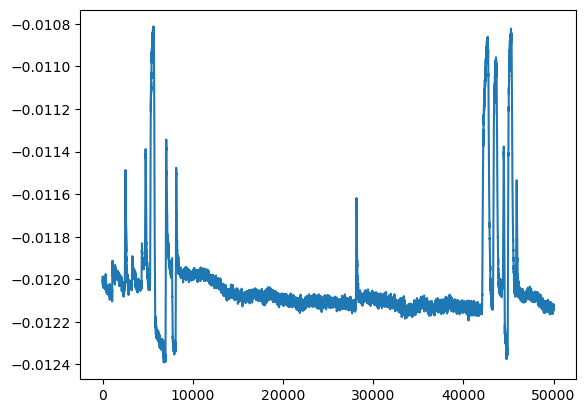

In [20]:
plt.plot(data[0][:50000])

In [11]:
welch_psd = bv.compute_psd()
welch_psd.shape

Effective window size : 0.256 (s)


(63, 129)

This is Ethan's contribution. Here is a variable you want to assign for the results: `eeg_spike_results`. It is an array of arrays with the count of the EEG spikes.

Right now I only put 3 entries of 3 features, as an example.

[[150  50  75]
 [100 100  75]
 [  0   0 275]]
[ 83.33333333  50.         141.66666667]
            Spike threshold reached on average
artificial                           83.333333
natural                              50.000000
food                                141.666667


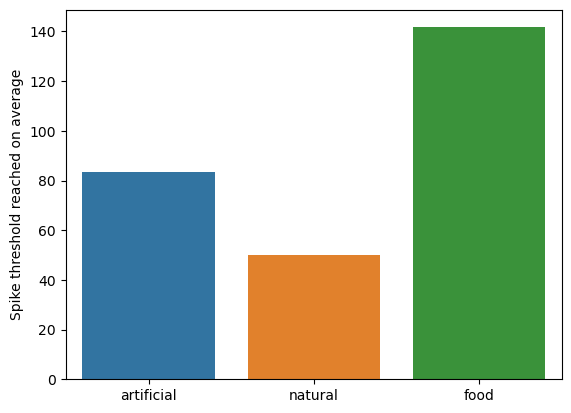

In [ ]:
eeg_categories = ["artificial", "natural", "food"]
eeg_spike_results = np.array([[150, 50, 75], [100, 100, 75], [0, 0, 275]])
eeg_spike_avg = []

print(eeg_spike_results)

# take the average of each column
for i in range(len(eeg_spike_results)):
    eeg_spike_avg.append(np.mean(eeg_spike_results[:, i]))

eeg_df = pd.DataFrame(data = np.array(eeg_spike_avg).transpose(), index = eeg_categories, columns = ["Spike threshold reached on average"])
print(eeg_df)

plot_results = sns.barplot(x = eeg_df.index, y = eeg_df["Spike threshold reached on average"])

Analysis:

We will use the 1 way ANOVA test to see if there is a significant difference between subjects so we know that it isn't just preference what makes people happy.

Null Hypothesis: There is a significant difference between the means of the participants' scores that people have their given category invoke happy feelings.

Alternative Hypothesis: There is no significant difference between the means of the participants' scores that people have their given category invoke happy feelings.

In [ ]:
from scipy.stats import f_oneway

# 1 way ANOVA test
print(f_oneway(*eeg_spike_results.transpose().tolist()))

F_onewayResult(statistic=0.8942307692307692, pvalue=0.457192094701011)


Because the p-value is ________ than the alpha value of 0.05, we can...